<a href="https://colab.research.google.com/github/melissaortegaa/monografia/blob/main/ME03_data_preparation_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Seminario**

**Especialización en Analítica y Ciencia de Datos**

Universidad de Antioquia

Noviembre 2023

Grupo 3. Melissa Ortega Alzate CC.1036964792

# 1 Objetivo

Preparar un conjunto de imágenes para su posterior utilización en un algoritmo de Machine Learning, específicamente Redes Neuronales Convolucionales.

# 2 Resumen

Primero se importan las librerías necesarias y se define una función para visualizar diagramas de barras y figuras aleatorias del conjunto de imágenes.

Luego se carga y limpia el archivo que contiene las etiquetas de las imágenes, procedimiento que incluye conocer el tamaño y tipo de datos de cada columna, verificar duplicados y cambiar el nombre de las columnas. Así como, el número de imágenes en la carpeta, su tamaño, formato y tipo.

Más adelante se encuentra la sección de visualización, allí se grafica un diagrama de barras para para visualizar la distribución de instancias respecto a las categorías de la variable de salida. Además, se usa la función definida que permite ver imágenes aleatorias para conocer 16 imágenes y sus clases.

En el preprocesamiento de las imágenes, se utiliza un ciclo for para cargar y estandarizar las imágenes dividiendo por 255. Además, se establece el tamaño de todas como 224x224 pixeles en caso de que alguna estuviera por fuera de esta especificación. En este ciclo se crea una lista, en donde cada elemento corresponde a una imágen de tamaño (150128). Luego, la lista es convertida a un arreglo NumPy

Se dumifica la variable de salida, obteniendo 1 para las imágenes clasificadas con Salmonella y 0 para las imágenes saludables. Con lo anterior, se obtiene un archivo .csv modificado con las clases y tensor (arreglo de numPy multidimensional) con las imágenes.

Finalmente, el tensor con las imágenes es asignado a X y las etiquetas a y, para ser divididas en los trenes de entrenamiento y prueba. Ambas variables será posteriormente utilizadas para el entrenamiento de un modelo de Red Neuronal Convolucional.

# 3 Librerías

In [1]:
# Librerías del sistema
import os
import glob
import requests
from io import BytesIO

# Manipulación de datos
import cv2
import numpy as np
import pandas as pd
import random

# Visualización de graficos
import matplotlib.pyplot as plt
import seaborn as sns

# Definición del modelo
from sklearn.model_selection import train_test_split

# Librerías de Deep Learning
from keras import layers, models

# Ignorar Warnings
import warnings
warnings.filterwarnings("ignore")

# 4 Funciones

In [2]:
# Función para visualizar imágenes aleatorias

def show_random_images_from_github(github_directory_url, df):
    '''
    Returns a figure build from samples figures from the data set.

    Parameters:
            df          [dataframe]  Dataframe with images path and corresponding classes

    Returns:
            Plot of figure
    '''

    # Obtener una lista aleatoria de rutas de imágenes desde el DataFrame
    image_files = random.sample(df['filepaths'].tolist(), 25)
    fig, axes = plt.subplots(5, 5, figsize=(10, 10))

    for i, ax in enumerate(axes.ravel()):
        image_file = image_files[i]
        class_name = df[df['filepaths'] == image_file]['label'].values[0]

        # Descargar la imagen desde GitHub
        image_url = f'{github_directory_url}/{image_file}'
        response = requests.get(image_url)
        if response.status_code == 200:
            img = plt.imread(BytesIO(response.content))
            ax.imshow(img)

            # Definir estilos
            title_color = 'red' if class_name == 'Salmonella' else 'blue'
            ax.set_title(class_name, fontsize=8, color=title_color)
            ax.axis('off')

    plt.tight_layout()
    plt.show()


In [3]:
# Función para graficar atributos en barras
def bar_plot(df, target_var, title):
  '''
    Returns the figure build from input parameters.

      Parameters:
              df          [dataframe]  Features dataframe.
              target_var  [string]     Name of column of target variable or feature.
              title       [string]     Title for figure

      Returns:
              Plot of figure
  '''

  fig, axes = plt.subplots(1, 1)
  ax_cond = axes
  sns.countplot(df,
                  x = target_var,
                  ax = axes,
                  palette = 'mako',
                  zorder = 2,
                  order = df[target_var].value_counts().index,
                  alpha = 0.8
                  )

  for bars in axes.containers:
    axes.bar_label(bars, fmt='%.0f',fontweight = "bold", color ='gray')

  axes.set_xticklabels(ax_cond.get_xticklabels())
  axes.tick_params(labelsize = 8)
  axes.set_xlabel("")
  fig.tight_layout()
  plt.subplots_adjust(top = 0.9)
  fig.suptitle(title, fontsize = 12);

# 5 Desarrollo

### 5.1 Cargar el conjunto de datos

#### Etiquetas

In [4]:
# Definir ubicación de los datos
data_dir= "https://raw.githubusercontent.com/melissaortegaa/monografia/main/imgs/"
labels_url = 'https://raw.githubusercontent.com/melissaortegaa/monografia/main/labels.csv'

# Definir la variable objetivo
target_var = 'label'

In [5]:
# Leer el archivo con las etiquetas
df = pd.read_csv(labels_url)

# Vista preliminar del archivo con las etiquetas
df.head(15)

,images,label
0,salmo.1558.jpg,Salmonella
1,cocci.1866.jpg,Coccidiosis
2,cocci.171.jpg,Coccidiosis
3,salmo.1484.jpg,Salmonella
4,ncd.100.jpg,New Castle Disease
5,salmo.659.jpg,Salmonella
6,salmo.1386.jpg,Salmonella
7,healthy.1748.jpg,Healthy
8,healthy.1156.jpg,Healthy
9,healthy.1215.jpg,Healthy


In [6]:
# Diferentes clases en el archivo .csv
df['label'].unique()

array(['Salmonella', 'Coccidiosis', 'New Castle Disease', 'Healthy'],
      dtype=object)

In [7]:
# Revisar nulos, tipo de datos en cada columna y tamaño del archivo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8067 entries, 0 to 8066
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  8067 non-null   object
 1   label   8067 non-null   object
dtypes: object(2)
memory usage: 126.2+ KB


El archivo original con las etiquetas contiene **8067** instancias y 2 columnas, ambas son tipo object. Las instancias están clasificadas originalmente en 4 enfermedades diferentes:` Salmonella, Coccidiosis, New Castle Disease y Healthy`. De acuerdo con la información mostrada, no hay valores nulos en ninguna columna. Además, la base de datos ocupa 126.2+ KB, y es fácil de procesar en términos de almacenamiento y carga. A continuación, se describen algunas características de las imágenes:

#### Imágenes

Se carga una lista de 20 figuras de muestra. El data set original contien 5028 imágenes. En el notebook "ME03_data_preparation_local.ipynb" se puede ver esta misma preparación de datos usando todos las imágenes disponibles.

In [8]:
# Lista de nombres de las imágenes
archivos = ['salmo.0.jpg', 'salmo.1.jpg', 'salmo.2.jpg','salmo.3.jpg', 'salmo.4.jpg',
            'salmo.5.jpg', 'salmo.6.jpg', 'salmo.7.jpg', 'salmo.8.jpg', 'salmo.9.jpg',
            'healthy.0.jpg', 'healthy.1.jpg', 'healthy.2.jpg', 'healthy.3.jpg', 'healthy.4.jpg',
            'healthy.5.jpg', 'healthy.6.jpg', 'healthy.7.jpg', 'healthy.8.jpg', 'healthy.9.jpg', ]

In [9]:
# Análisis exploratorio de las imágenes

# URL de la imagen en GitHub
image_url = 'https://raw.githubusercontent.com/melissaortegaa/monografia/main/imgs/healthy.0.jpg'

# Descargar la imagen desde la URL
response = requests.get(image_url)

# Verificar si la descarga fue exitosa (código de respuesta 200)
if response.status_code == 200:
    # Leer la imagen en formato de bytes
    image_bytes = BytesIO(response.content)

    # Decodificar la imagen con OpenCV
    image = cv2.imdecode(np.frombuffer(image_bytes.read(), np.uint8), cv2.IMREAD_COLOR)

    # Realizar el análisis exploratorio de la imagen
    img_size = (image.shape[0], image.shape[1])
    channels = image.shape[2]

    print(f"Características de la figura de muestra")
    print()
    print(f"El tamaño de la figura es: {img_size} pixeles")
    print(f"La figura tiene: {channels} canales")
    print(f"La figura es de tipo: {image.dtype}")
    print(f"La figura tiene píxeles en el rango: {image.min()} - {image.max()}")
else:
    print('Error al descargar la imagen desde GitHub')


Características de la figura de muestra

El tamaño de la figura es: (224, 224) pixeles
La figura tiene: 3 canales
La figura es de tipo: uint8
La figura tiene píxeles en el rango: 31 - 255


Los datos almacenados como "uint8" son variables que almacenan números enteros de 8 bits sin signo. Por lo tanto, solo pueden representar valores enteros no negativos. Indica que el número se almacena en 8 bits de memoria. Así, un número de 8 bits puede representar 2^8 (256) valores diferentes, que van desde 0 hasta 255, y es precisamente el rango de valores para cada pixel de la imágen a color.

In [10]:
# Cuando se ejecuta el código de manera local, se puede contar el número de imágenes descargadas:

# Lista de archivos en el directorio
# archivos_en_carpeta = os.listdir(data_dir)

# # Mostrar el número de archivos
# print(f"En la carpeta hay {len(archivos_en_carpeta)} imágenes")

En la carpeta original hay menos imagenes de las que se registran en el archivo .csv (5027 versus 8067). Esto, porque las imágenes escogidas, corresponden solamente a aquellas con clase "Salmonella" y "Healthy". A continuación, se realiza una limpieza del archivo .csv para dejar solo las dos clases de interés:

### 5.2 Limpieza de datos

In [11]:
# Filtrar las instancias donde 'label' es igual a 'Healthy' o 'Salmonella'
df = df[df['label'].isin(['Healthy', 'Salmonella'])]

In [12]:
# Estandarizar el nombre de las columnas
df.columns = ['filepaths', 'label' ]

In [13]:
# Mostrar el DataFrame transformado
df

,filepaths,label
0,salmo.1558.jpg,Salmonella
3,salmo.1484.jpg,Salmonella
5,salmo.659.jpg,Salmonella
6,salmo.1386.jpg,Salmonella
7,healthy.1748.jpg,Healthy
...,...,...
8061,healthy.22.jpg,Healthy
8062,healthy.935.jpg,Healthy
8063,salmo.1607.jpg,Salmonella
8065,salmo.1641.jpg,Salmonella


In [14]:
# Verificar registros duplicados
df.loc[df.duplicated()]

,filepaths,label


No existen registros duplicados en el archivo con las etiquetas.

### 5.3 Visualización de datos

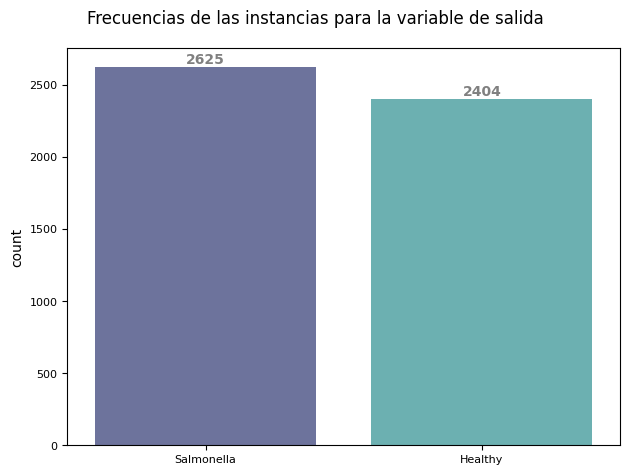

In [15]:
# Visualizar la frecuencia de las instancias
bar_plot(df, target_var, 'Frecuencias de las instancias para la variable de salida')

Se observa que la variable objetivo presenta dos categorías muy equilibradas. Por lo tanto, el data set está balanceado con un 52,1 % de los registros en la categoría "Salmonella" vs 47,9 % para "Healthy", representando aquellas imágenes que fueron confirmadas con presencia del microorganismo patógeno Salmonella spp. y las que no, respectivamente.

In [16]:
# Usar la función para visualizar 25 imágenes aleatorias y sus clases
# show_random_images(df)

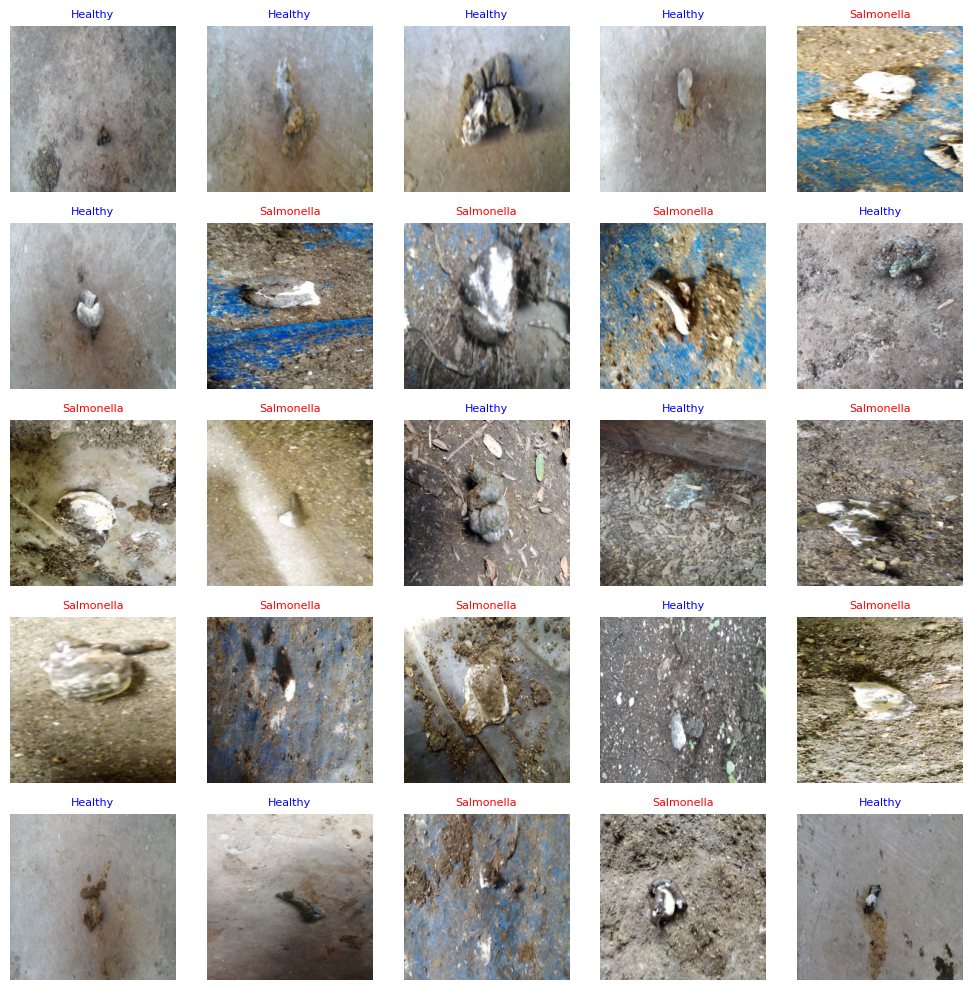

Al ejecutar la celda que presenta las imágenes aleatorias, se han evidenciado algunas figuras borrosas y oscuras. Además, el entorno en donde fue tomada la fotografía de las heces es muy variado. Es importante considerar realizar un zoom a las imágenes en donde se pueda mantener las heces y restar detalles alrededor que puedan comprometer el desempeño del modelo de clasificación a entrenar.

### 5.4 Preprocesamiento

#### Aumento de datos

No es necesario realizar un aumento de datos. El data set se encuentra bastante balanceado y las imágenes disponbiles son suficientes para avanzar con el proyecto. Más adelante, se sugiere verificar esta hipótesis.

#### Estandarizar y redimensionar

In [17]:
# Crear lista de imágenes transformadas
lista_img = []

# Crear lista para encontrar imágenes corruptas
corrupt_images = []

for archivo in archivos:
    # Construir la URL completa de la imagen
    image_url = data_dir + archivo

    # Descargar la imagen desde GitHub
    response = requests.get(image_url)

    if response.status_code == 200:
        # Leer la imagen desde GitHub
        im = cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_COLOR)

        # Especificar el tamaño de las imágenes en caso de que alguna no esté igual
        im = cv2.resize(im, (224, 224), interpolation=cv2.INTER_CUBIC)

        # Estandarizar los pixeles para obtener valores entre 0 y 1
        im = im / 255

        # Cambiar el tamaño del vector
        im = im.ravel()

        # Agregar la imagen a la lista
        lista_img.append(im)
    else:
        corrupt_images.append(archivo)


In [18]:
# Imprimir imágenes corruptas
print(f'Imágenes corruptas encontradas: {corrupt_images}')

Imágenes corruptas encontradas: []


Como todas las imágenes abrieron, no hay archivos corruptos.

In [19]:
# Tamaño de las imágenes luego de las transformaciones
print(f" El tamaño de cada imágen transformada es: {im.shape})")

 El tamaño de cada imágen transformada es: (150528,))


La lista que contiene las imágenes se describe a continuación:

In [20]:
# Tamaño de la lista
print(f"La lista de imágenes tiene {len(lista_img)} elementos. ")

La lista de imágenes tiene 20 elementos. 


Cada elemento de la lista es un arreglo de NumPy que contiene los 150528 pixeles. Es decir, una imagen.

Debido a que se tienen 10 imágenes, pero 5029 etiquetas. A continuación, se buscan las etiquetas que sobran y se eliminan del DataFrame.

In [21]:
# Encontrar la diferencia entre las imágenes y las etiquetas
etiquetas_sobran = list(set(df['filepaths'].tolist()) - set(archivos))

# Imprimir cuáles instancias del DataFrame no están relacionadas con ninguna imagen de la carpeta
print("Las imágenes que no se encuentran en la carpeta descargada:", etiquetas_sobran)

Las imágenes que no se encuentran en la carpeta descargada: ['healthy.1974.jpg', 'healthy.898.jpg', 'healthy.869.jpg', 'healthy.1762.jpg', 'salmo.914.jpg', 'salmo.1835.jpg', 'salmo.1271.jpg', 'salmo.717.jpg', 'healthy.1581.jpg', 'salmo.941.jpg', 'healthy.854.jpg', 'salmo.471.jpg', 'healthy.553.jpg', 'salmo.858.jpg', 'salmo.1565.jpg', 'healthy.1304.jpg', 'healthy.1593.jpg', 'healthy.587.jpg', 'salmo.2005.jpg', 'salmo.2051.jpg', 'pcrsalmo.314.jpg', 'salmo.2166.jpg', 'healthy.494.jpg', 'healthy.808.jpg', 'healthy.866.jpg', 'healthy.1747.jpg', 'salmo.132.jpg', 'healthy.900.jpg', 'pcrhealthy.32.jpg', 'salmo.467.jpg', 'salmo.410.jpg', 'salmo.808.jpg', 'healthy.1319.jpg', 'salmo.251.jpg', 'healthy.790.jpg', 'healthy.1716.jpg', 'salmo.1307.jpg', 'salmo.999.jpg', 'healthy.1152.jpg', 'healthy.963.jpg', 'healthy.65.jpg', 'healthy.921.jpg', 'salmo.712.jpg', 'salmo.1574.jpg', 'salmo.359.jpg', 'salmo.907.jpg', 'pcrhealthy.168.jpg', 'healthy.1014.jpg', 'salmo.1498.jpg', 'salmo.666.jpg', 'healthy.583.

In [22]:
# Eliminar las instancias que sobran en el DataFrame
df = df[~df['filepaths'].isin(etiquetas_sobran)]

# Verificar el nuevo tamaño del DataFrame
df.shape

(20, 2)

Ahora si se tienen 10 imágenes, cada una con su etiqueta correspondiente.

In [23]:
# Visualizar el primer elemento de la lista de imágenes
lista_img[0]

array([0.45098039, 0.51372549, 0.56078431, ..., 0.2627451 , 0.3372549 ,
       0.39607843])

### Dummies

In [24]:
# Crear variables dummies para la columna de salida
df_dummies = pd.get_dummies(df['label'], drop_first= True, dtype= int)

# Combinar las variables dummies con el DataFrame original
df_final = pd.concat([df, df_dummies], axis= 1)

# Eliminar la columna 'label' del DataFrame original
df_final.drop('label', axis= 1, inplace= True)

# Resetear el índice
df_final.reset_index(drop=True, inplace=True)

# Muestra el DataFrame final
df_final

,filepaths,Salmonella
0,healthy.7.jpg,0
1,healthy.9.jpg,0
2,healthy.0.jpg,0
3,healthy.8.jpg,0
4,healthy.5.jpg,0
5,salmo.4.jpg,1
6,healthy.4.jpg,0
7,healthy.6.jpg,0
8,salmo.3.jpg,1
9,salmo.1.jpg,1


## Split train and test

In [25]:
# Definir la variable X convirtiendo la lista de figuras en un arreglo de NumPy
X = np.array(lista_img)
X.shape

(20, 150528)

X es un arreglo de NumPy contiene todas las imágenes en forma de un array NumPy con una forma de (20, 150528), lo que significa que se tienen 20 imágenes, cada una con una resolución de 150528 píxeles.



In [26]:
# Definir y
y = df_final['Salmonella']

In [27]:
# Dividir el DataFrame en los trenes de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size= 0.8,
                                                    shuffle= True,
                                                    random_state= 123,
                                                    stratify= y)

In [28]:
# Imprimir el tamaño de los trenes de entrenamiento y prueba
print("Tamaño del tren de entrenamiento:", X_train.shape)
print("Tamaño de las etiquetas de entrenamiento:", y_train.shape)
print("-------")
print("Tamaño del tren de prueba:", X_test.shape)
print("Tamaño de las etiquetas de prueba:", y_test.shape)

Tamaño del tren de entrenamiento: (16, 150528)
Tamaño de las etiquetas de entrenamiento: (16,)
-------
Tamaño del tren de prueba: (4, 150528)
Tamaño de las etiquetas de prueba: (4,)


## Modelo de prueba

In [29]:
# Instanciar el modelo de tipo Sequential
model = models.Sequential()

# Definir una capa densa de activación con 512 neuronas y una activación de tipo relu
model.add(layers.Dense(512, activation='relu', input_shape = (224*224*3,)))

# Definir una capa adicional con 1 neuronas (porque tengo 1 posible salida) y una activación tipo sigmoid para clasificación binara
model.add(layers.Dense(1, activation='sigmoid'))

# Visualizar un resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               77070848  
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 77071361 (294.00 MB)
Trainable params: 77071361 (294.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
# Compilar el modelo
model.compile(loss='binary_crossentropy',
            optimizer = 'rmsprop',
            metrics =['accuracy'])

In [31]:
# Entrenar el modelo
model.fit(X, y, batch_size= 100, epochs= 8)

Epoch 1/8
1/1 [==============================] - 4s 4s/step - loss: 0.6818 - accuracy: 0.6000
Epoch 2/8
1/1 [==============================] - 2s 2s/step - loss: 155.6529 - accuracy: 0.5000
Epoch 3/8
1/1 [==============================] - 2s 2s/step - loss: 465.2397 - accuracy: 0.5000
Epoch 4/8
1/1 [==============================] - 3s 3s/step - loss: 222.0123 - accuracy: 0.5000
Epoch 5/8
1/1 [==============================] - 2s 2s/step - loss: 60.4352 - accuracy: 0.5000
Epoch 6/8
1/1 [==============================] - 2s 2s/step - loss: 29.4355 - accuracy: 0.5000
Epoch 7/8
1/1 [==============================] - 2s 2s/step - loss: 15.7504 - accuracy: 0.5000
Epoch 8/8
1/1 [==============================] - 2s 2s/step - loss: 25.9983 - accuracy: 0.5000


# Conclusiones

En esta preparación de datos no se realizó aumento en el número de imágenes, se considera que las que están disponibles son suficientes para entrenar una red neuronal artificial de tipo convolucional. Sin embargo, se debe considerar que en posterior desarrollo del modelo, puede requerirse.

Las imágenes se mantuvieron a color, en este caso 3 canales con RGB. Pues se considera, que hace parte fundamental para la detección de los patrones en las imágenes. Se estandarizaron las imágenes para que los pixeles sean números entre 0 y 1.

Se redujo el archivo .csv para que sólo contuviera las etiquetas de las imágenes de interés ("Salmonella" y "Healthy").

A la final se obtuvieron los trenes de entrenamiento y prueba funcionales para definir, compilar y entrenar una red neuronal con dos capas.

# Bibliografía

- Dataset original: Kaggle (2022). Chicken Disease Image Classification. Disponible en: https://www.kaggle.com/datasets/allandclive/chicken-disease-1

- Documentación oficial de NumPy (Acceso: 2023). Disponible en: https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.uint

- Documentación oficial de Pandas (Acceso: 2023). Disponible en: https://pandas.pydata.org/docs/user_guide/basics.html#dtypes

- Scikit-learn: "Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.Support Vector Machines documentation" (Acceso: 2023). Disponbile en: https://scikit-learn.org/stable/modules/svm.html

- Scikit-image: "9. Image adjustment: transforming image content" (Acceso: 2023). Disponible en: https://scikit-image.org/docs/stable/user_guide/transforming_image_data.html

- Alarcón, C (s.f). Curso de Redes Neuronales Convolucionales con Python en Platzi. Disponible en: https://platzi.com/cursos/redes-neuronales-convolucionales/